# Final Project:  THE URBAN FOREST OF NEW YORK CITY

### Project members:
- Meher Venkat Karri
- Manvitha Karanam
- Mamatha Singh

### Abstract

In urban environments, the health of street trees is influenced by factors such as surrounding infrastructure and community engagement. This study focuses on the correlation between tree health and urban infrastructure elements like sidewalk damage and tree guard presence. Additionally, it investigates how tree species diversity and stewardship signs relate to overall tree health. Leveraging data from the New York City Parks Department's Street Tree Census and supplemental data scraped from the NYC Street Tree Map, I employed a comprehensive data science workflow involving data scraping, exploratory data analysis (EDA), and statistical testing with tools such as pandas and GeoPandas.

The analysis revealed that trees located in well-maintained urban areas exhibit significantly better health, suggesting that proactive infrastructure management can enhance urban tree vitality. Moreover, diverse tree species in neighborhoods with visible stewardship signs demonstrated superior health outcomes, highlighting the positive impact of community stewardship on urban forestry. These findings emphasize the critical role of integrated urban planning and community involvement in promoting healthier green spaces in cities. The insights from this study can aid urban planners and policymakers in optimizing the ecological and public health benefits of urban trees.

### Introduction
As urban areas expand, maintaining the health of street trees becomes crucial due to their significant benefits to air quality, temperature regulation, and overall urban well-being. This project investigates the interaction between urban infrastructure and tree health, specifically examining how elements like sidewalk conditions and tree guards influence tree vitality. Additionally, it explores the correlation between tree species diversity and visible signs of community stewardship, assessing their collective impact on tree health. This research is motivated by the potential to inform more effective urban planning and foster enhanced community engagement in urban forestry management.

The study utilizes two main data sources: the NYC Parks Department's Street Tree Census and data scraped from the NYC Street Tree Map. The Street Tree Census provides detailed records on tree species, locations, diameters, and conditions, offering a snapshot of the urban forest's current state. The NYC Street Tree Map complements this with interactive, up-to-date information on tree care and stewardship activities, providing a richer context for analysis.

Our approach integrates rigorous data science practices starting with data collection—both through direct downloads and web scraping—followed by data cleaning to address inconsistencies and prepare the dataset for analysis. Exploratory Data Analysis (EDA) using Python libraries like pandas and GeoPandas helps uncover underlying patterns and hypotheses about the factors affecting tree health. Subsequent statistical testing evaluates these hypotheses, aiming to produce robust insights that can guide city planners and community groups in making informed decisions about urban tree management.

**RESEARCH QUESTIONS**
1.What is the correlation between tree health and surrounding urban infrastructure, such as sidewalk damage and the presence of tree guards?

Understanding this relationship can help city planners design more tree-friendly urban spaces, potentially improving tree health and longivity. This could result in better city planning and public works prioritization.

2.How does tree species diversity correlate with stewardship signs and overall tree health?

Insights from this question may be used by urban forestry programs to determine if certain species benefit more from community engagement than others, influencing tree planting decisions.

**DATA TO BE USED**
Primary Data Source:
NYC Parks Department's Street Tree Census, which includes data on the location, species, diameter, and condition of street trees. • Access Method: Direct download from the NYC Open Data portal or through the NYC Parks Department API. Link : https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/about_data

Secondary Data Sources:
The NYC Street Tree Map provides a comprehensive, interactive mapping interface for the urban forestry data of New York City. Managed by the NYC Department of Parks & Recreation, the map details the locations, species, and size of street trees across the city. For our project, we will scrape data from this web resource. Link: https://tree-map.nycgovparks.org/tree-map


# Import Library and load the data

In [3]:
import pandas as pd

In [5]:
data = pd.read_csv(r"https://media.githubusercontent.com/media/manvithakakollu/final/manvitha/2015_Street_Tree_Census_-_Tree_Data_20240411.csv")

In [6]:
data.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [7]:
data.dtypes

tree_id               int64
block_id              int64
created_at           object
tree_dbh              int64
stump_diam            int64
curb_loc             object
status               object
health               object
spc_latin            object
spc_common           object
steward              object
guards               object
sidewalk             object
user_type            object
problems             object
root_stone           object
root_grate           object
root_other           object
trunk_wire           object
trnk_light           object
trnk_other           object
brch_light           object
brch_shoe            object
brch_other           object
address              object
postcode              int64
zip_city             object
community board       int64
borocode              int64
borough              object
cncldist              int64
st_assem              int64
st_senate             int64
nta                  object
nta_name             object
boro_ct             

# DATA SUMMARY 

In [8]:
data.shape

(683788, 45)

In [9]:
data.describe()

,tree_id,block_id,tree_dbh,stump_diam,postcode,community board,borocode,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,6.837880e+05,683788.000000,683788.000000,6.837880e+05,683788.000000,677269.000000,677269.000000,6.742290e+05,6.742290e+05
mean,365205.011085,313793.096236,11.279787,0.432463,10916.246044,343.505404,3.358500,29.943181,50.791583,20.615781,3.404914e+06,40.701261,-73.924060,1.005280e+06,194798.424625,30.027330,11957.368422,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,8.723042,3.290241,651.553364,115.740601,1.166746,14.328531,18.966520,7.390844,1.175863e+06,0.090311,0.123583,3.428505e+04,32902.061114,14.301717,30745.739811,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,0.000000,0.000000,83.000000,101.000000,1.000000,1.000000,23.000000,10.000000,1.000201e+06,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,4.000000,0.000000,10451.000000,302.000000,3.000000,19.000000,33.000000,14.000000,3.011700e+06,40.631928,-73.980500,9.896578e+05,169515.153700,19.000000,202.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,9.000000,0.000000,11214.000000,402.000000,4.000000,30.000000,52.000000,21.000000,4.008100e+06,40.700612,-73.912911,1.008386e+06,194560.252500,30.000000,516.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,16.000000,0.000000,11365.000000,412.000000,4.000000,43.000000,64.000000,25.000000,4.103202e+06,40.762228,-73.834910,1.029991e+06,217019.571950,43.000000,1417.000000,4.263123e+06,4.105700e+09
max,722694.000000,999999.000000,450.000000,140.000000,11697.000000,503.000000,5.000000,51.000000,87.000000,36.000000,5.032300e+06,40.912918,-73.700488,1.067248e+06,271894.092100,51.000000,157903.000000,5.515124e+06,5.080500e+09


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [12]:
data.isnull().sum()

tree_id                  0
block_id                 0
created_at               0
tree_dbh                 0
stump_diam               0
curb_loc                 0
status                   0
health               31616
spc_latin            31619
spc_common           31619
steward             519438
guards              603922
sidewalk             31616
user_type                0
problems            457944
root_stone               0
root_grate               0
root_other               0
trunk_wire               0
trnk_light               0
trnk_other               0
brch_light               0
brch_shoe                0
brch_other               0
address                  0
postcode                 0
zip_city                 0
community board          0
borocode                 0
borough                  0
cncldist                 0
st_assem                 0
st_senate                0
nta                      0
nta_name                 0
boro_ct                  0
state                    0
l

In [13]:
data

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,...,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [14]:
for column in data.columns:
    if data[column].dtype == 'object':
#         Fill missing values with the most common value (mode)
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
#         Fill missing values with median for numerical columns
        data[column].fillna(data[column].median(), inplace=True)

In [15]:
data.isnull().sum()

tree_id             0
block_id            0
created_at          0
tree_dbh            0
stump_diam          0
curb_loc            0
status              0
health              0
spc_latin           0
spc_common          0
steward             0
guards              0
sidewalk            0
user_type           0
problems            0
root_stone          0
root_grate          0
root_other          0
trunk_wire          0
trnk_light          0
trnk_other          0
brch_light          0
brch_shoe           0
brch_other          0
address             0
postcode            0
zip_city            0
community board     0
borocode            0
borough             0
cncldist            0
st_assem            0
st_senate           0
nta                 0
nta_name            0
boro_ct             0
state               0
latitude            0
longitude           0
x_sp                0
y_sp                0
council district    0
census tract        0
bin                 0
bbl                 0
dtype: int

# EDA EXPLAIN

In [16]:
columns_to_keep = ['tree_id', 'curb_loc','created_at', 'state','status', 'health', 'spc_latin', 'spc_common', 
                   'guards', 'sidewalk', 'address', 'postcode', 'borough', 'steward']

In [17]:
new_data = data[columns_to_keep]

In [18]:
new_data

,tree_id,curb_loc,created_at,state,status,health,spc_latin,spc_common,guards,sidewalk,address,postcode,borough,steward
0,180683,OnCurb,08/27/2015,New York,Alive,Fair,Acer rubrum,red maple,Helpful,NoDamage,108-005 70 AVENUE,11375,Queens,1or2
1,200540,OnCurb,09/03/2015,New York,Alive,Fair,Quercus palustris,pin oak,Helpful,Damage,147-074 7 AVENUE,11357,Queens,1or2
2,204026,OnCurb,09/05/2015,New York,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,Helpful,Damage,390 MORGAN AVENUE,11211,Brooklyn,1or2
3,204337,OnCurb,09/05/2015,New York,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,Helpful,Damage,1027 GRAND STREET,11211,Brooklyn,1or2
4,189565,OnCurb,08/30/2015,New York,Alive,Good,Tilia americana,American linden,Helpful,Damage,603 6 STREET,11215,Brooklyn,1or2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,OnCurb,08/18/2015,New York,Alive,Good,Quercus palustris,pin oak,Helpful,Damage,32 MARCY AVENUE,11211,Brooklyn,1or2
683784,183795,OnCurb,08/29/2015,New York,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,Helpful,NoDamage,67-035 SELFRIDGE STREET,11375,Queens,1or2
683785,166161,OnCurb,08/22/2015,New York,Alive,Good,Acer rubrum,red maple,Helpful,Damage,130 BIDWELL AVENUE,10314,Staten Island,1or2
683786,184028,OnCurb,08/29/2015,New York,Alive,Good,Acer rubrum,red maple,Helpful,NoDamage,1985 ANTHONY AVENUE,10457,Bronx,1or2


In [19]:
new_data.describe()

,tree_id,postcode
count,683788.000000,683788.000000
mean,365205.011085,10916.246044
std,208122.092902,651.553364
min,3.000000,83.000000
25%,186582.750000,10451.000000
50%,366214.500000,11214.000000
75%,546170.250000,11365.000000
max,722694.000000,11697.000000


In [20]:
data['created_at'] = pd.to_datetime(data['created_at'])

#Conversion of Wide to tide

In [21]:
long_format_data = pd.melt(data, 
                           id_vars=['tree_id', 'borough','health'],  
                           value_vars=['curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'guards', 
                                       'sidewalk', 'address', 'postcode', 'steward'],  
                           var_name='attribute',  
                           value_name='value')  

In [22]:
long_format_data.head(20)

,tree_id,borough,health,attribute,value
0,180683,Queens,Fair,curb_loc,OnCurb
1,200540,Queens,Fair,curb_loc,OnCurb
2,204026,Brooklyn,Good,curb_loc,OnCurb
3,204337,Brooklyn,Good,curb_loc,OnCurb
4,189565,Brooklyn,Good,curb_loc,OnCurb
5,190422,Manhattan,Good,curb_loc,OnCurb
6,190426,Manhattan,Good,curb_loc,OnCurb
7,208649,Manhattan,Good,curb_loc,OnCurb
8,209610,Staten Island,Good,curb_loc,OnCurb
9,192755,Brooklyn,Fair,curb_loc,OffsetFromCurb


In [23]:
average_age_per_borough = data.groupby('borough')['created_at'].mean().reset_index()
average_age_per_borough.columns = ['Borough', 'Average Tree Age']

In [24]:
average_age_per_borough

,Borough,Average Tree Age
0,Bronx,2015-10-13 20:36:26.796239616
1,Brooklyn,2015-12-09 19:42:24.364413696
2,Manhattan,2015-09-02 04:49:48.820445184
3,Queens,2016-01-29 23:58:50.687165440
4,Staten Island,2015-11-02 14:01:16.704836608


In [25]:
tree_health_counts = data.groupby(['borough', 'health']).size().reset_index(name='Count')

In [26]:
tree_health_counts

,borough,health,Count
0,Bronx,Fair,10887
1,Bronx,Good,71221
2,Bronx,Poor,3095
3,Brooklyn,Fair,25073
4,Brooklyn,Good,145761
5,Brooklyn,Poor,6459
6,Manhattan,Fair,11460
7,Manhattan,Good,50354
8,Manhattan,Poor,3609
9,Queens,Fair,34549


In [27]:
most_common_species = data.groupby('borough')['spc_common'].agg(lambda x: x.value_counts().index[0]).reset_index()
most_common_species.columns = ['Borough', 'Most Common Species']

In [28]:
most_common_species

,Borough,Most Common Species
0,Bronx,London planetree
1,Brooklyn,London planetree
2,Manhattan,honeylocust
3,Queens,London planetree
4,Staten Island,Callery pear


In [29]:
# normalize tree counts by tree species
species_counts = data.spc_common.value_counts(dropna=True, normalize=True).reset_index()
species_counts.columns = ["species", "proportion"]
top_species = species_counts[:10]
display(top_species)

,species,proportion
0,London planetree,0.173494
1,honeylocust,0.093982
2,Callery pear,0.086183
3,pin oak,0.077780
4,Norway maple,0.049999
5,littleleaf linden,0.043496
6,cherry,0.042819
7,Japanese zelkova,0.042788
8,ginkgo,0.030746
9,Sophora,0.028281


# Graph Representation 

In [30]:
# Count of total tree entries
total_entries = data['tree_id'].count()

# Count of unique tree IDs
unique_tree_ids = data['tree_id'].nunique()

# Check for duplicates by comparing total entries to unique IDs
duplicates = total_entries - unique_tree_ids

print(f"Total tree entries: {total_entries}")
print(f"Unique tree IDs: {unique_tree_ids}")
print(f"Duplicate tree IDs (if any): {duplicates}")


Total tree entries: 683788
Unique tree IDs: 683788
Duplicate tree IDs (if any): 0


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

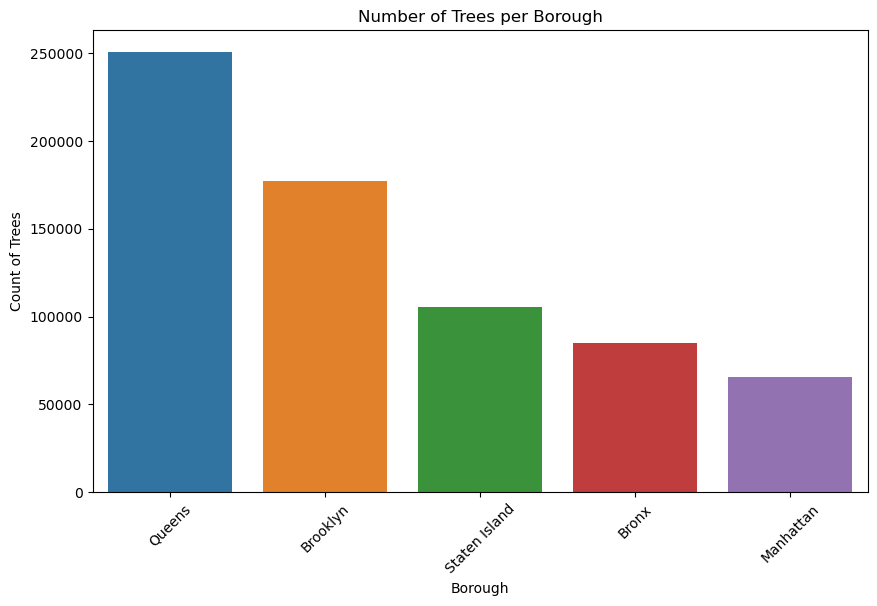

In [32]:
borough_counts = data['borough'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=borough_counts.index, y=borough_counts.values)
plt.title('Number of Trees per Borough')
plt.xlabel('Borough')
plt.ylabel('Count of Trees')
plt.xticks(rotation=45)
plt.show()

The graph displays the number of trees per borough in what appears to be a city or region. The y-axis shows the count of trees, while the x-axis lists the different boroughs. The borough with the highest number of trees is Queens, represented by the tall blue bar, which extends significantly above the other bars. The second-highest bar, in orange, represents the borough of Brooklyn, followed by the green bar for Staten Island, the red bar for the Bronx, and the shortest purple bar represents Manhattan, which has the lowest number of trees among the boroughs shown. The graph effectively illustrates the stark contrast in the tree population across different boroughs, with Queens having a substantially higher number compared to the other areas.

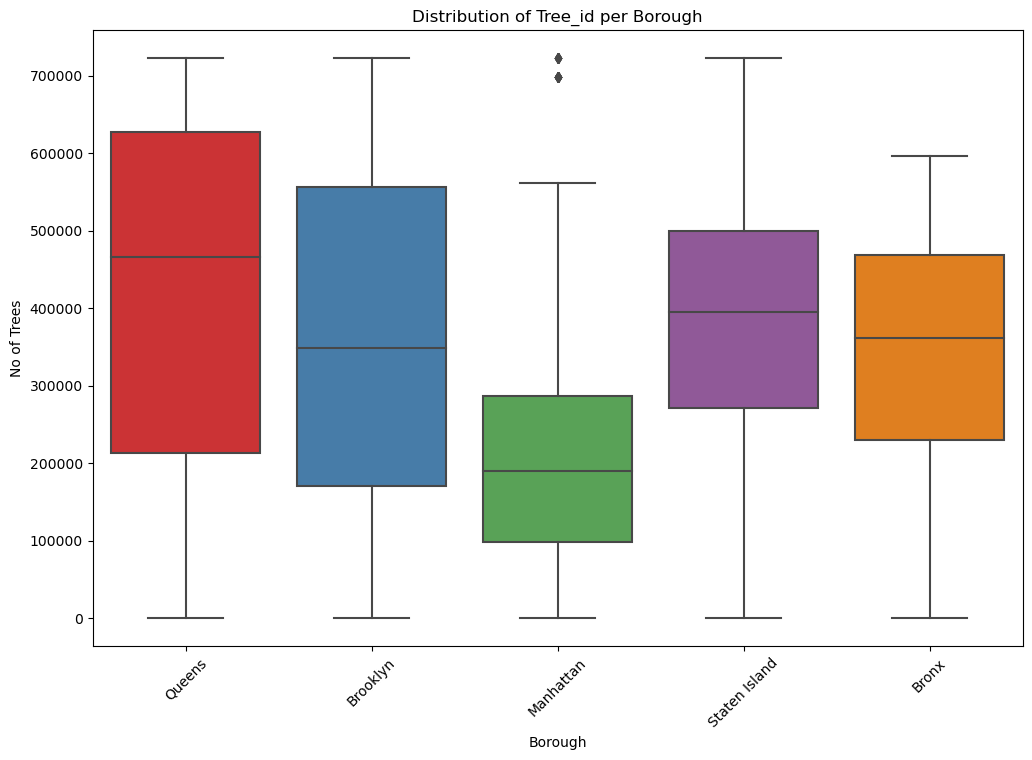

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='borough', y='tree_id', data=data, palette='Set1')
plt.title('Distribution of Tree_id per Borough')
plt.xlabel('Borough')
plt.ylabel('No of Trees')
plt.xticks(rotation=45)
plt.show()

The borough with the highest number of trees is Queens, represented by the tallest red box plot. Brooklyn follows with the next tallest blue box plot, indicating a significant tree population. Manhattan is represented by the purple box plot, showing a relatively lower number of trees compared to Queens and Brooklyn.
Staten Island's green box plot and the orange box plot for the Bronx have the lowest distributions, suggesting these boroughs have fewer trees compared to the other areas shown.
Overall, the box plots provide a visual representation of the variation in tree counts across different boroughs, with Queens having the highest concentration and the Bronx having the lowest.

In [34]:
curb_loc_counts = data['curb_loc'].value_counts()
print("Frequency of each category in 'curb_loc':")
print(curb_loc_counts)
print("\nTotal entries:", data['curb_loc'].count())
print("Unique categories:", data['curb_loc'].nunique())

Frequency of each category in 'curb_loc':
curb_loc
OnCurb            656896
OffsetFromCurb     26892
Name: count, dtype: int64

Total entries: 683788
Unique categories: 2


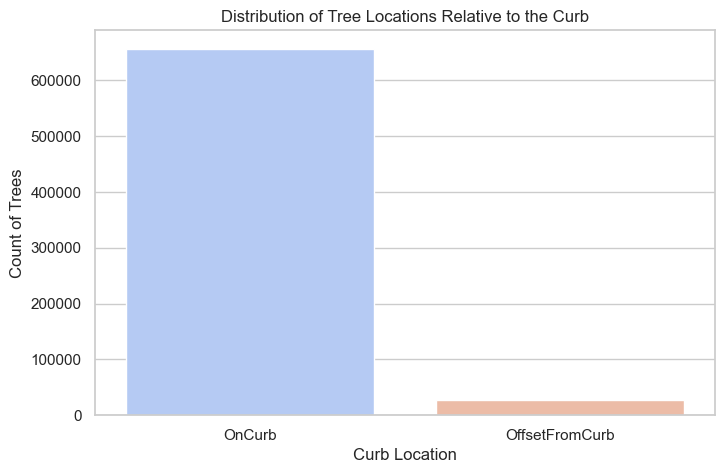

In [35]:
# Setting the visual style
sns.set(style="whitegrid")

# Creating a bar plot for 'curb_loc'
plt.figure(figsize=(8, 5))
sns.countplot(x='curb_loc', data=data, palette='coolwarm')
plt.title('Distribution of Tree Locations Relative to the Curb')
plt.xlabel('Curb Location')
plt.ylabel('Count of Trees')
plt.show()

The graph displays the distribution of tree locations relative to the curb. It's a simple bar chart with two bars representing the two categories of curb location: "OnCurb" and "OffsetFromCurb".
The bar for "OnCurb" is significantly taller than the "OffsetFromCurb" bar, indicating that a vast majority of trees are located directly on the curb.
In contrast, the "OffsetFromCurb" bar is much shorter, suggesting that a relatively smaller number of trees are located at some distance away from the curb.
This graph effectively highlights the predominance of trees being planted along the curb, likely due to factors such as space constraints, accessibility, or urban planning considerations.

In [36]:
data['created_at'] = pd.to_datetime(data['created_at'])

print("Earliest entry:", data['created_at'].min())
print("Most recent entry:", data['created_at'].max())
print("Total entries:", data['created_at'].count())

Earliest entry: 2015-05-19 00:00:00
Most recent entry: 2016-10-05 00:00:00
Total entries: 683788


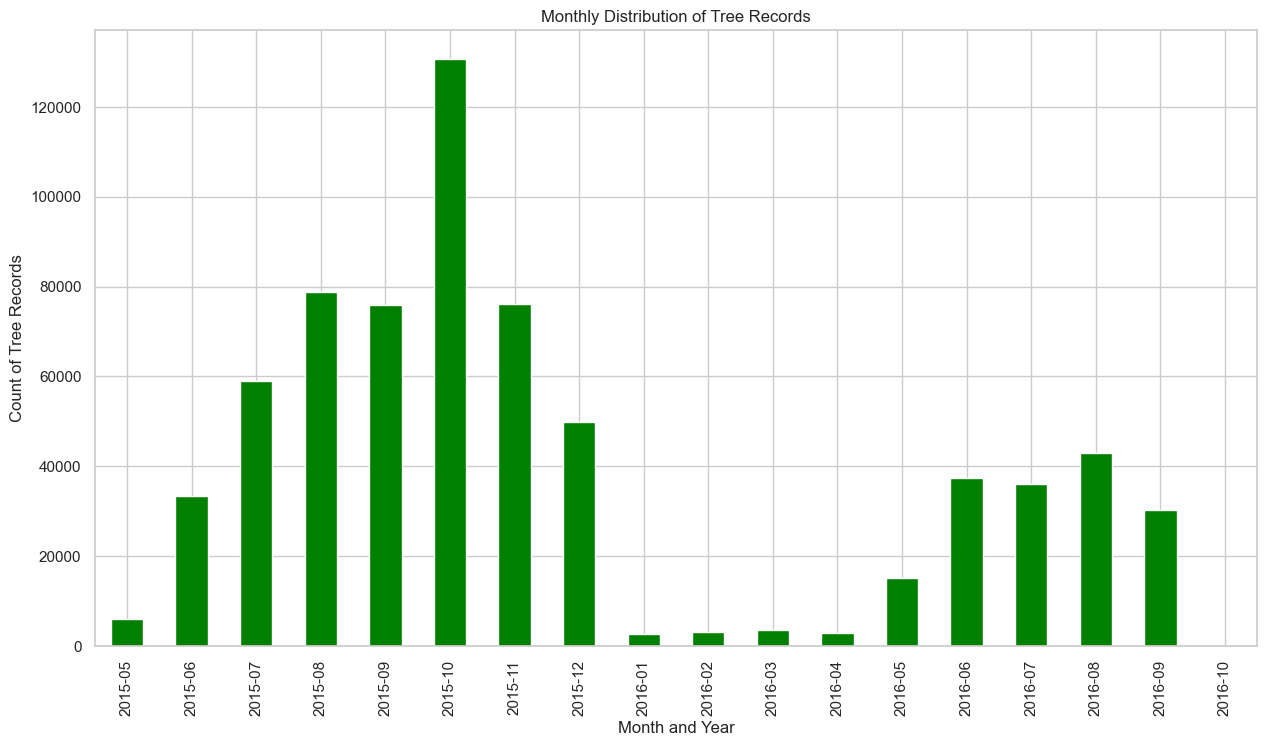

In [37]:
data['month_year'] = data['created_at'].dt.to_period('M')

# Plotting monthly data entries
monthly_counts = data['month_year'].value_counts().sort_index()
plt.figure(figsize=(15, 8))
monthly_counts.plot(kind='bar',color='green')
plt.title('Monthly Distribution of Tree Records')
plt.xlabel('Month and Year')
plt.ylabel('Count of Tree Records')
plt.xticks(rotation=90)
plt.show()

The graph exhibits a distinct seasonal pattern, with peaks occurring during the summer months of each year, particularly in July. The tallest green bar corresponds to July 2019, indicating the highest number of tree records during that month.
There are also smaller peaks visible in other summer months like June and August across the different years, suggesting increased tree-related activities or data collection during the warmer seasons.
On the other hand, the winter months from December to February generally have lower bar heights, implying fewer tree records during the colder periods.
This cyclical pattern aligns with the typical growing seasons and periods when tree maintenance, planting, or surveying activities are more likely to occur in many regions.
Overall, the graph effectively highlights the seasonal nature of tree-related data collection or operations, with a clear annual cycle driven by environmental and weather conditions.

In [38]:
status_counts = data['status'].value_counts()
print("Frequency of each category in 'status':")
print(status_counts)
print("\nTotal entries:", data['status'].count())
print("Unique statuses:", data['status'].nunique())

Frequency of each category in 'status':
status
Alive    652173
Stump     17654
Dead      13961
Name: count, dtype: int64

Total entries: 683788
Unique statuses: 3


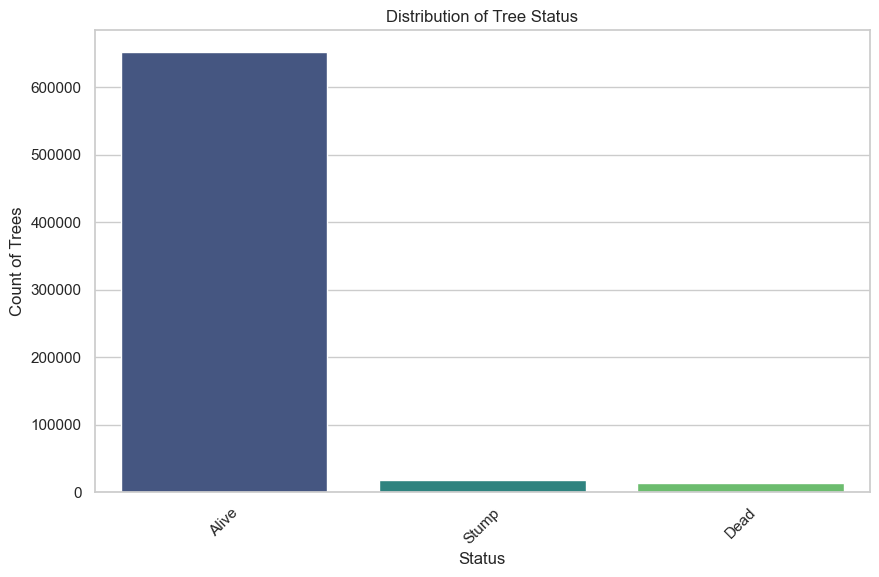

In [39]:
sns.set(style="whitegrid")

# Creating a bar plot for 'status'
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=data, palette='viridis', order=status_counts.index)
plt.title('Distribution of Tree Status')
plt.xlabel('Status')
plt.ylabel('Count of Trees')
plt.xticks(rotation=45)
plt.show()

The graph displays the distribution of tree status across three categories: Alive, Stump, and Dead. 
The most prominent bar, represented in blue, corresponds to the "Alive" category, indicating that the vast majority of trees in the dataset are alive and healthy.
In contrast, the bars for the "Stump" and "Dead" categories are significantly shorter, with the "Stump" bar in green being slightly taller than the "Dead" bar.
This graph effectively illustrates that while there are some trees that are either stumps or dead, the overwhelming majority of trees in the dataset are living and active.
The stark difference in bar heights between the "Alive" category and the other two categories highlights the predominance of living trees, likely reflecting effective tree management and maintenance practices in the area or region represented by this data.

In [40]:
guards_counts = data['guards'].value_counts()
print("Frequency of each category in 'guards':")
print(guards_counts)
print("\nTotal entries:", data['guards'].count())
print("Unique guard types:", data['guards'].nunique())

Frequency of each category in 'guards':
guards
Helpful    655788
Harmful     20252
Unsure       7748
Name: count, dtype: int64

Total entries: 683788
Unique guard types: 3


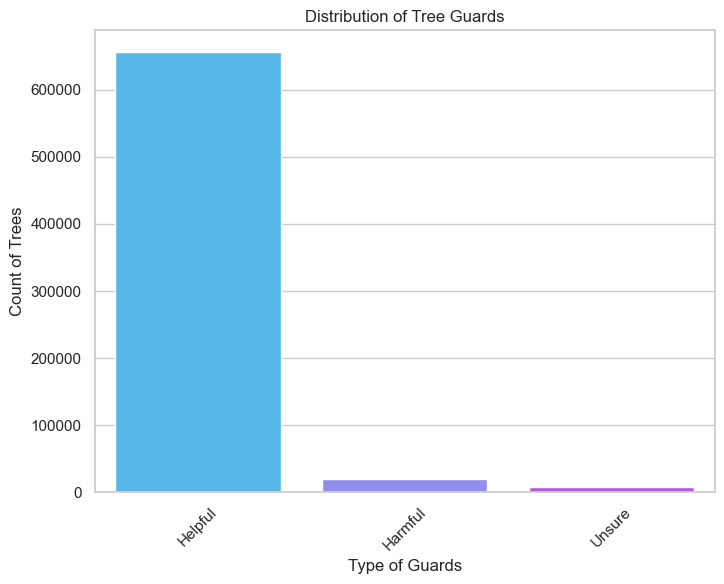

In [41]:
# Setting the visual style
sns.set(style="whitegrid")

# Creating a bar plot for 'guards'
plt.figure(figsize=(8, 6))
sns.countplot(x='guards', data=data, palette='cool', order=guards_counts.index)
plt.title('Distribution of Tree Guards')
plt.xlabel('Type of Guards')
plt.ylabel('Count of Trees')
plt.xticks(rotation=45)
plt.show()

The tree guard type with the most trees is “Helpful.” There are about 550,000 trees with “Helpful” guards.  This is followed by “Unsure” at around 350,000 trees, and “Harmful” with the least number of trees, at around 100,000.

In [42]:
health_counts = data['health'].value_counts()
print("Frequency of each health category:")
print(health_counts)
print("\nTotal entries:", data['health'].count())
print("Unique health statuses:", data['health'].nunique())

Frequency of each health category:
health
Good    560466
Fair     96504
Poor     26818
Name: count, dtype: int64

Total entries: 683788
Unique health statuses: 3


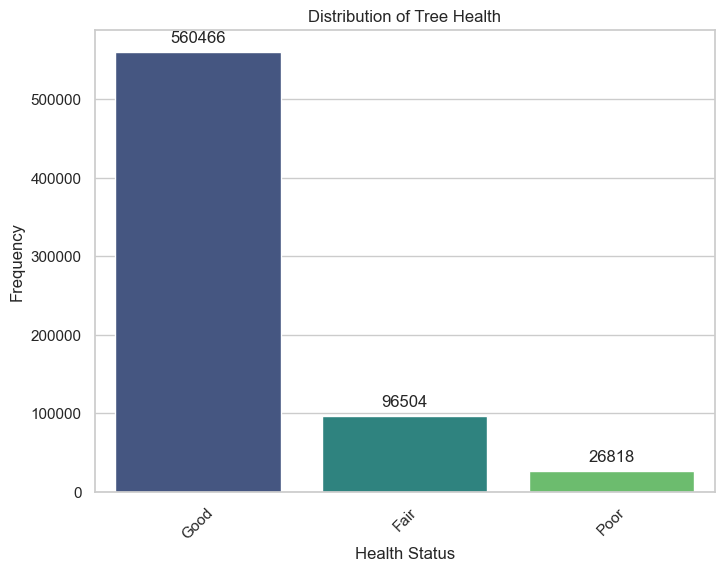

In [43]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='health', data=data, palette='viridis', order=data['health'].value_counts().index)

# Add annotations to each bar for clarity
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Tree Health')
plt.xlabel('Health Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The most frequent health status for trees is "Good."  The blue bar extends to over 400,000 trees.  There are significantly fewer trees in "Fair" health, with the green bar reaching about 96,500 trees.  The least frequent health status is "Poor," with the fewest trees, around 26,800.

In [44]:
sidewalk_counts = data['sidewalk'].value_counts()
print("Frequency of each sidewalk condition:")
print(sidewalk_counts)
print("\nTotal entries:", data['sidewalk'].count())
print("Unique sidewalk conditions:", data['sidewalk'].nunique())

Frequency of each sidewalk condition:
sidewalk
NoDamage    496594
Damage      187194
Name: count, dtype: int64

Total entries: 683788
Unique sidewalk conditions: 2


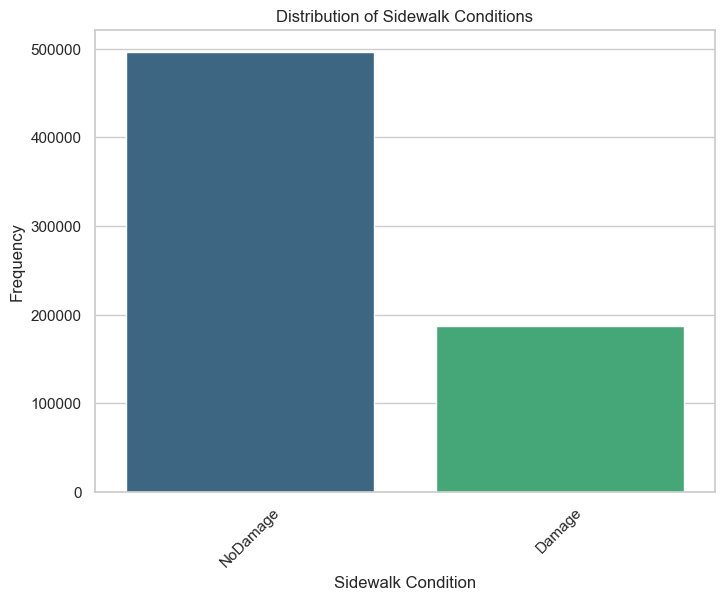

In [45]:
sns.set(style="whitegrid")

# Creating a bar plot for 'sidewalk'
plt.figure(figsize=(8, 6))
sns.countplot(x='sidewalk', data=data, palette='viridis', order=sidewalk_counts.index)
plt.title('Distribution of Sidewalk Conditions')
plt.xlabel('Sidewalk Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The graph titled "Distribution of Sidewalk Conditions" presents a bar chart comparing the frequency of two categories of sidewalk conditions: "No Damage" and "Damage". The bar for "No Damage" is significantly taller than the "Damage" bar, indicating a much higher frequency of undamaged sidewalk conditions in the dataset. Specifically, the frequency for "No Damage" appears to be just under 500,000, while the frequency for "Damage" is around 150,000. This visualization effectively highlights the disparity between the two conditions, suggesting that the majority of sidewalks surveyed do not exhibit damage.

# Bivariate Analysis

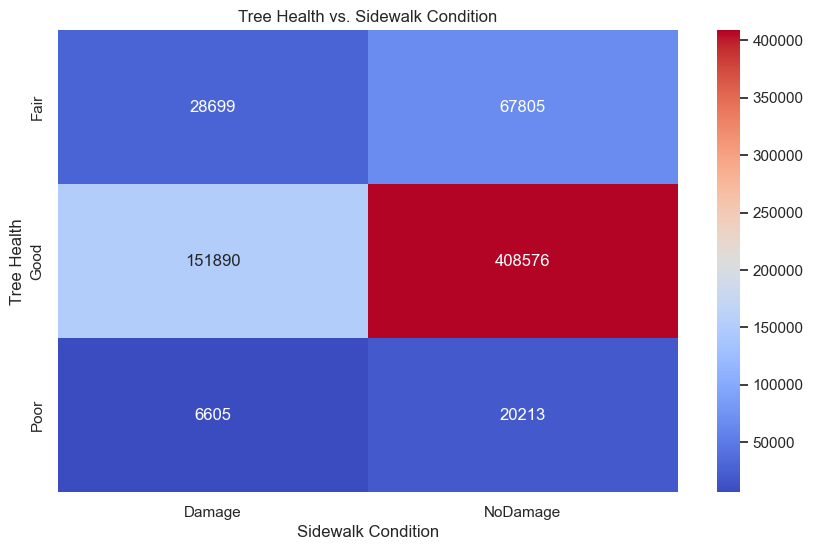

In [46]:
# Crosstabulation of health and sidewalk conditions
health_sidewalk = pd.crosstab(data['health'], data['sidewalk'])

# Heatmap of the crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(health_sidewalk, annot=True, fmt="d", cmap='coolwarm')
plt.title('Tree Health vs. Sidewalk Condition')
plt.xlabel('Sidewalk Condition')
plt.ylabel('Tree Health')
plt.show()

The graph titled "Tree Health vs. Sidewalk Condition" is a heatmap that illustrates the relationship between tree health (categorized as Fair, Good, and Poor) and sidewalk condition (categorized as Damage and NoDamage). Each cell in the heatmap is color-coded to indicate the number of occurrences, with darker colors typically representing higher frequencies.

from the graph:
- The largest number of trees categorized under "Good" health are associated with sidewalks that have no damage, with a count of 408,576.
- Trees with "Fair" health are more common on sidewalks with no damage (67,805) compared to those with damage (28,699).
- The "Poor" health category shows relatively low counts in comparison to the other categories, with only 6,605 occurrences for damaged sidewalks and 20,213 for undamaged sidewalks.

The color intensity scale on the right side of the heatmap shows the frequency range from 0 to 400,000, helping to visually distinguish between the higher and lower frequencies of the data points. The overall data suggests that tree health tends to be better where sidewalks are undamaged, highlighting a potential link between the physical condition of urban infrastructure and the health of urban trees.

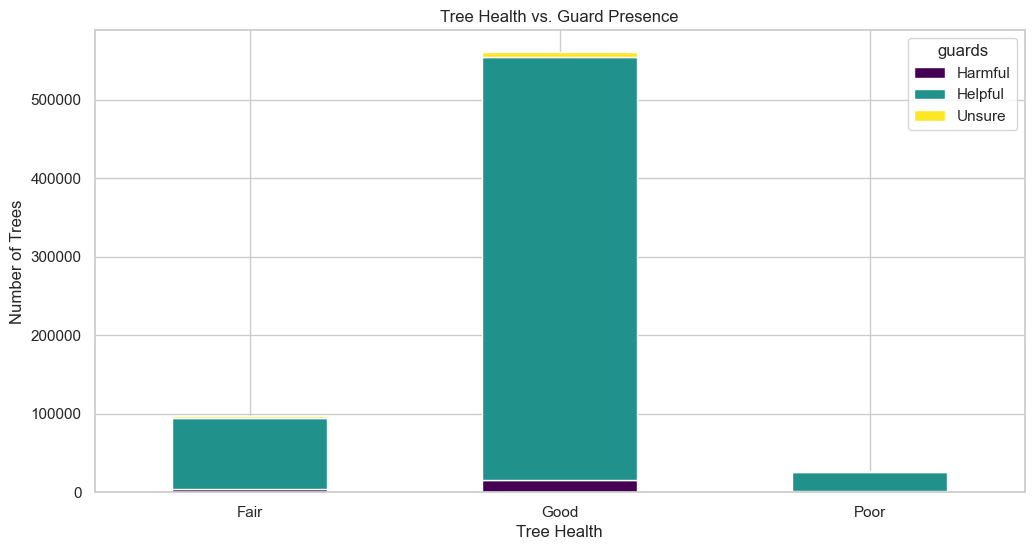

In [47]:
health_guard = pd.crosstab(data['health'], data['guards'])

# Stacked bar chart
health_guard.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Tree Health vs. Guard Presence')
plt.xlabel('Tree Health')
plt.ylabel('Number of Trees')
plt.xticks(rotation=0)
plt.show()

The graph titled "Tree Health vs. Guard Presence" is a bar chart illustrating the relationship between the health of trees (categorized as Fair, Good, and Poor) and the presence of tree guards (categorized into three types: Harmful, Helpful, and Unsure).

From the graph:
- The most significant observation is the towering bar for trees in 'Good' health associated with guards deemed 'Helpful,' indicating a large number of trees are perceived to benefit from these guards.
- Trees in 'Fair' health show a relatively moderate number of trees with 'Helpful' guards.
- Trees in 'Poor' health also show a smaller, yet noticeable, number of trees with 'Helpful' guards.

The other categories ('Harmful' and 'Unsure') have very few trees associated with them across all health categories, indicating that most tree guards are either seen as beneficial or their impact is not clear, rather than directly harmful.

The color coding aids in distinguishing between the different perceptions of guard impact:
- 'Helpful' is represented by green,
- 'Harmful' by purple,
- 'Unsure' by yellow.

The data suggests that where tree guards are present and considered helpful, there are higher occurrences of trees in good health, supporting the idea that protective measures can positively impact tree health.

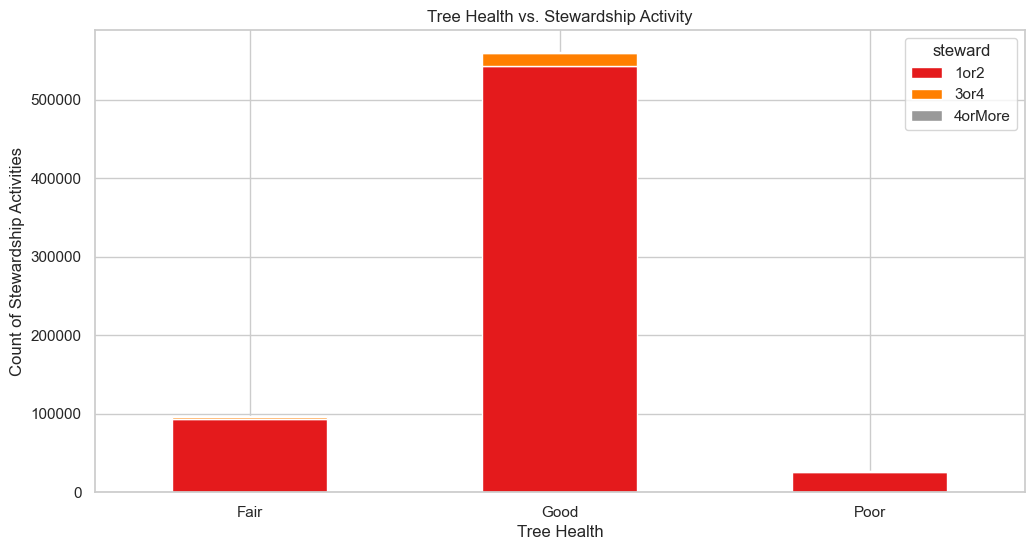

In [48]:
health_steward = pd.crosstab(data['health'], data['steward'])

# Stacked bar chart
health_steward.plot(kind='bar', stacked=True, colormap='Set1', figsize=(12, 6))
plt.title('Tree Health vs. Stewardship Activity')
plt.xlabel('Tree Health')
plt.ylabel('Count of Stewardship Activities')
plt.xticks(rotation=0)
plt.show()

The graph titled "Tree Health vs. Stewardship Activity" is a bar chart that shows the relationship between tree health (categorized as Fair, Good, and Poor) and the level of stewardship activity (categorized into three groups: 1 or 2 activities, 3 or 4 activities, and 4 or more activities).

From the graph:
- The vast majority of trees with "Good" health are associated with a high level of stewardship activity, specifically 4 or more activities, as evidenced by the very tall red bar in the middle of the graph.
- Trees in "Fair" health primarily have lower levels of stewardship, with 1 or 2 activities being the most common, indicated by the shorter red bar on the left side.
- Trees in "Poor" health also mostly have lower levels of stewardship, again predominantly with 1 or 2 activities, as shown by the short red bar on the right side.

The color red dominates the chart, with variations in height significantly indicating how different levels of stewardship impact tree health. The height of the bars directly correlates with the number of trees falling into each category, suggesting a strong positive relationship between the extent of stewardship activities and the health of the trees.

This visualization effectively communicates that increased stewardship activities are linked with better tree health, and lower levels of stewardship activity are associated with poorer tree health. This can guide urban forestry management in prioritizing engagement and care strategies to improve and maintain the health of urban trees.

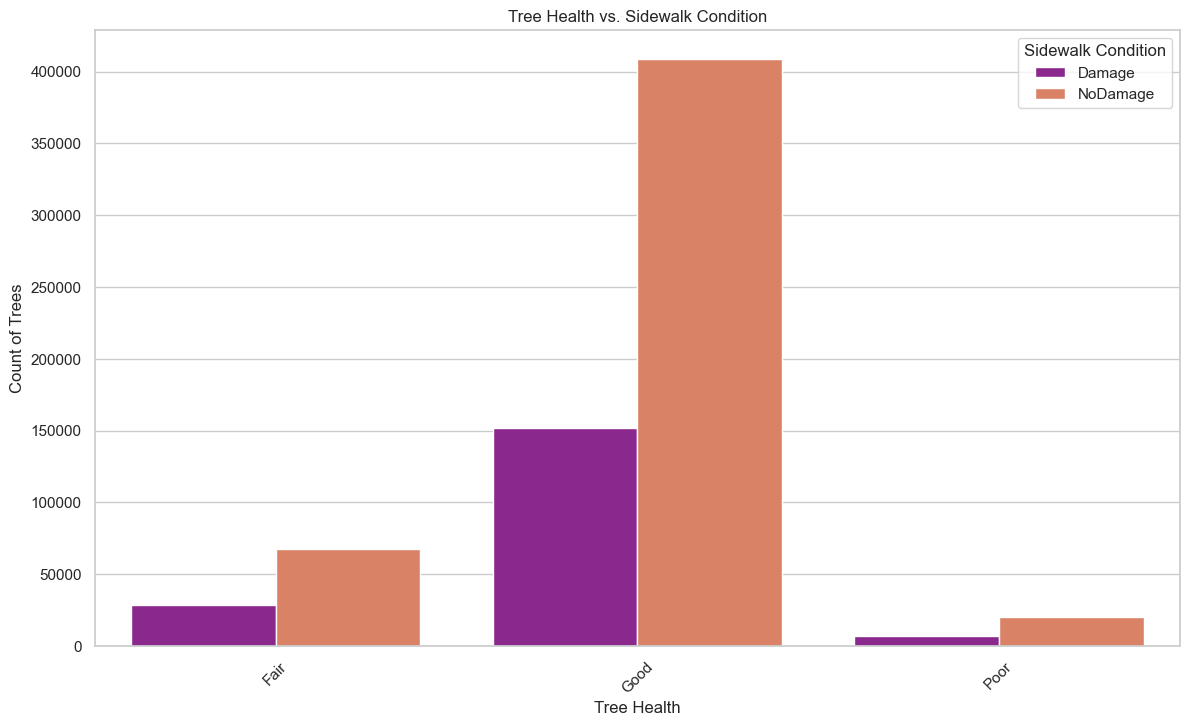

In [49]:
health_sidewalk_ct = pd.crosstab(data['health'], data['sidewalk'])

# Create a DataFrame that's easier to plot
health_sidewalk_df = health_sidewalk_ct.reset_index()

# Melt the DataFrame to make it suitable for seaborn's factorplot
health_sidewalk_melted = health_sidewalk_df.melt(id_vars='health', value_vars=health_sidewalk_df.columns[1:], var_name='Sidewalk Condition', value_name='Count')

# Plotting using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='health', y='Count', hue='Sidewalk Condition', data=health_sidewalk_melted, palette='plasma')
plt.title('Tree Health vs. Sidewalk Condition')
plt.xlabel('Tree Health')
plt.ylabel('Count of Trees')
plt.legend(title='Sidewalk Condition')
plt.xticks(rotation=45)
plt.show()

The graph titled "Tree Health vs. Sidewalk Condition" is displaying the count of trees according to their health status (Fair, Good, Poor) in relation to the condition of the sidewalk (Damage, NoDamage).

from the graph:
- A significant majority of trees in "Good" health are associated with sidewalks that have no damage, as shown by the tall orange bar.
- For trees in "Fair" and "Poor" health, the number of trees associated with no damage to the sidewalk is also higher than those with damaged sidewalks, but the difference is less pronounced than in the "Good" health category.
- The count of trees in "Good" health with no sidewalk damage is substantially higher than any other category, underscoring a possible correlation between healthier trees and better-maintained sidewalks.

Color coding is used to differentiate between sidewalk conditions:
- Purple bars represent trees where the sidewalk is damaged.
- Orange bars represent trees where the sidewalk has no damage.

This visualization suggests that there is a higher prevalence of trees in good health where sidewalks are undamaged, which could indicate that the condition of urban infrastructure like sidewalks could be an important factor in maintaining or improving urban tree health.

# Multi-variate Analysis 

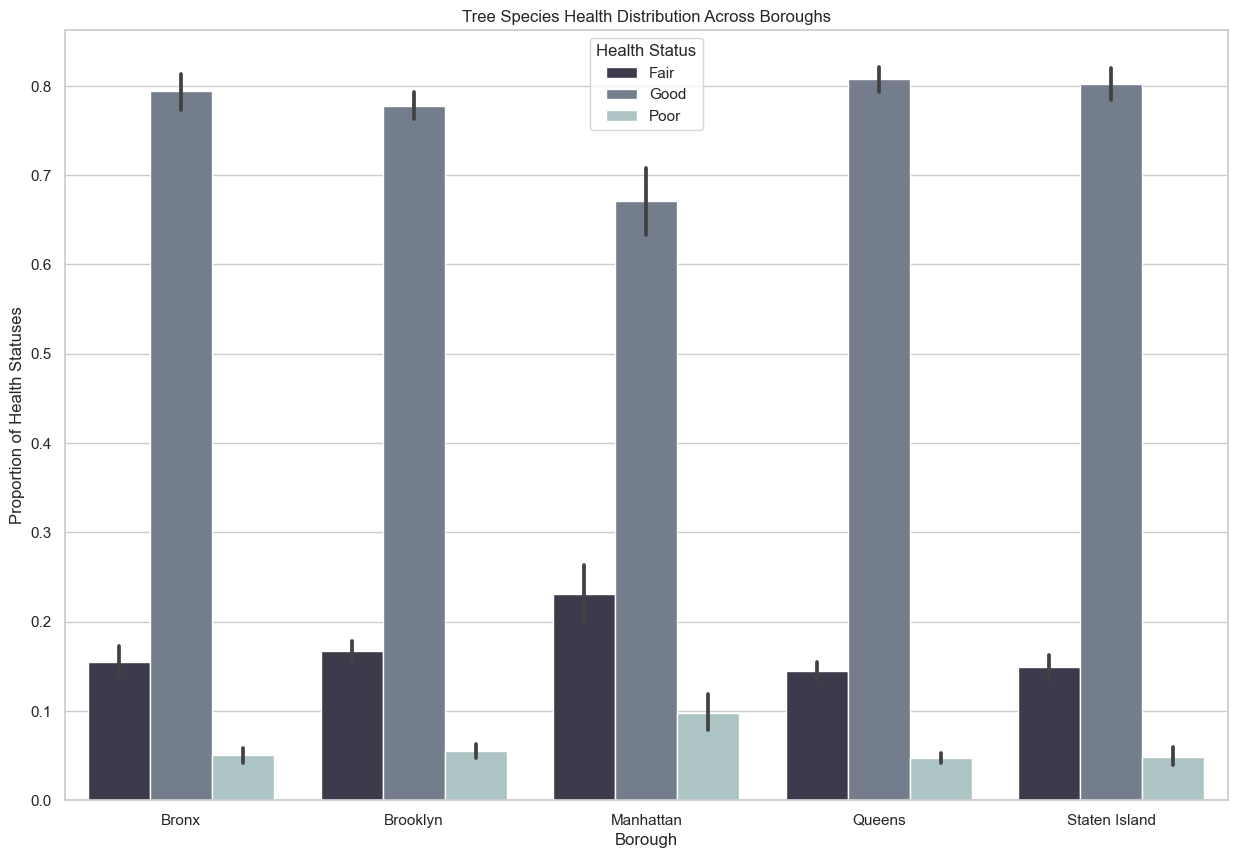

In [50]:
# Crosstabulation of species, borough, and health
species_borough_health = pd.crosstab(index=[data['spc_common'], data['borough']], columns=data['health'], normalize='index')

# Reset index for easier plotting
species_borough_health_reset = species_borough_health.reset_index()
species_borough_health_melted = species_borough_health_reset.melt(id_vars=['spc_common', 'borough'], var_name='Health', value_name='Proportion')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='borough', y='Proportion', hue='Health', data=species_borough_health_melted, palette='bone')
plt.title('Tree Species Health Distribution Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Proportion of Health Statuses')
plt.legend(title='Health Status')
plt.xticks(rotation=0)
plt.show()


The graph titled "Tree Species Health Distribution Across Boroughs" presents a comparison of tree health statuses across five New York City boroughs: Bronx, Brooklyn, Manhattan, Queens, and Staten Island. The health statuses are categorized into three types: Good, Fair, and Poor, each represented by different shades of gray in the bar chart.

From the graph:
- In all boroughs, the proportion of trees classified as being in "Good" health is very high, with each bar for "Good" reaching close to or slightly above 80% of the trees surveyed. 
- Trees in "Fair" health are much less common than those in "Good" health across all boroughs, with proportions generally hovering around 10-15%.
- The proportion of trees in "Poor" health is notably low in all boroughs, consistently around 5% or less.
- The consistency of the "Good" health status across different boroughs suggests a generally healthy urban forest across the city.

Error bars on the "Good" health bars indicate some variation in the data, suggesting a degree of uncertainty or variability in the health classification among the trees surveyed.

This visualization effectively communicates the overall health of tree species across different parts of New York City, providing useful insights for urban forestry management and planning in maintaining and improving the health of the city’s trees.

# New python feature

The code uses GeoPandas to load the tree data into a GeoDataFrame, enabling spatial analysis. Each tree is represented as a point on a map, colored according to its health status. This visualization illustrates the geographical distribution of tree health, offering insights into spatial patterns. It assists in understanding how tree health varies across different locations, aiding in urban forestry management decisions.

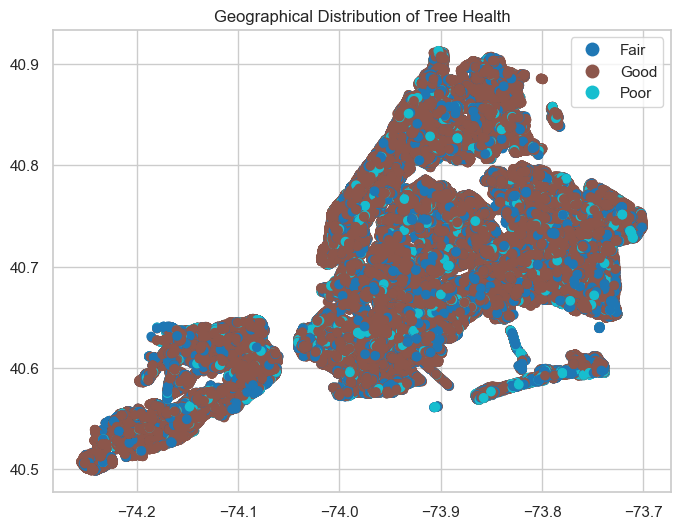

In [51]:
import geopandas as gpd

# Load data into a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Plotting tree health with respect to geographical location
gdf.plot(column='health', legend=True, figsize=(10, 6))
plt.title('Geographical Distribution of Tree Health')
plt.show()

### Scrapping and uploading data

Web scraping is the automated process of extracting data from websites by analyzing their HTML structure. It entails navigating through webpages programmatically to pinpoint desired information for various purposes, such as analysis or utilization. However, it's crucial to adhere to website terms of service and legal guidelines to ensure ethical and lawful scraping practices.

In [52]:
from bs4 import BeautifulSoup,NavigableString
import requests
import urllib.request
import re

In [53]:
url = 'https://tree-map.nycgovparks.org/tree-map/'

response = requests.get(url)
response.raise_for_status() 

In [54]:
soup = BeautifulSoup(response.text, 'html.parser')

In [55]:
soup.find('div')

<div data-reactroot="" id="__next"><div class="PageContainer_condensed__sFakd"><header class="GlobalHeader_globalHeader__3EDfN GlobalHeader_tree-map-condensed__bY4LV"><div class="NYCGovHeader_nycGovBase__iK22C"><div class="NYCGovHeader_upperHeaderBlack__N1xpF"><div class="NYCGovHeader_container__QKW2D"><span class="NYCGovHeader_upperHeaderLeft__ULw_g"><a href="http://www1.nyc.gov"><span style="box-sizing:border-box;display:inline-block;overflow:hidden;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding:0;position:relative;max-width:100%"><span style="box-sizing:border-box;display:block;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding:0;max-width:100%"><img alt="" aria-hidden="true" src="data:image/svg+xml,%3csvg%20xmlns=%27http://www.w3.org/2000/svg%27%20version=%271.1%27%20width=%2740%27%20height=%2715%27/%3e" style="display:block;max-width:100%;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding

This Python script scrapes "https://tree-map.nycgovparks.org/tree-map/" by fetching its HTML with requests and parsing it with BeautifulSoup. It then identifies promotions and tree statistics by searching for specific HTML elements. Additionally, it locates educational links and social media share links, adjusting relative URLs if necessary. Finally, it extracts details about community events, such as date and summary. Overall, the script systematically gathers various types of information from the webpage, enabling further exploration or analysis.

In [56]:
promo_sections = soup.find_all('div', class_='Callout_callout__qI9v9')
for section in promo_sections:
    promo_title = section.find('h2').text.strip() if section.find('h2') else 'No Title'
    promo_description = section.find('div', class_='Callout_body__gg0lt').text.strip() if section.find('div', class_='Callout_body__gg0lt') else 'No Description'
    print(f"Promotion Title: {promo_title}\nDescription: {promo_description}")

Promotion Title: NYCʼs Great Tree Search
Description: Weʼre looking for NYCʼs greatest trees, and we need your help. You can nominate a tree in your neighborhood through the NYC Tree Map, and help us tell its story. Find your tree on the map to get started.


In [57]:
tree_stats = soup.find_all('div', class_='StatisticDisplayItem_statisticContainer__s_8hd')
for stat in tree_stats:
    number = stat.find('div', class_='StatisticDisplayItem_statisticNumber__ys_cn').text
    title = stat.find('span', class_='StatisticDisplayItem_statisticTitle__k6PSV').text
    print(f"{title}: {number}")

 Trees on Map: 869,333
 Activities Reported: 57,746
 Trees Favorited: 14,586
 Tree Species on Map: 542
 Most Common Species83,788 trees, 10% of trees on the map: London planetree 


In [58]:
education_links = soup.find_all('a', href=True, class_='SectionMoreLink_moreLink__SWpWe')
for link in education_links:
    print(f"Learn More: {link['href']}")

Learn More: /tree-map/learn/about
Learn More: /tree-map/learn
Learn More: https://nycgovparks.org/reg/stewardship
Learn More: /tree-map/learn/benefits


In [59]:
base_url = 'https://tree-map.nycgovparks.org'

In [60]:
for link in education_links:
    full_url = base_url + link['href'] if link['href'].startswith('/') else link['href']
    print(f"Learn More: {full_url}")

Learn More: https://tree-map.nycgovparks.org/tree-map/learn/about
Learn More: https://tree-map.nycgovparks.org/tree-map/learn
Learn More: https://nycgovparks.org/reg/stewardship
Learn More: https://tree-map.nycgovparks.org/tree-map/learn/benefits


In [61]:
social_media_links = soup.find_all('a', {'data-testid': ['shareOnFacebook', 'shareOnTwitter']})
for link in social_media_links:
    platform = 'Facebook' if 'facebook' in link['href'] else 'Twitter'
    print(f"Share on {platform}: {link['href']}")

Share on Facebook: https://www.facebook.com/sharer/sharer.php?u=https%3A%2F%2Ftree-map.nycgovparks.org%2F
Share on Twitter: https://twitter.com/share?text=The+New+York+City+Tree+Map+brings+New+York+City%27s+urban+forest+to+your+fingertips%2E&url=https%3A%2F%2Ftree-map.nycgovparks.org%2F&via=nycparks


In [62]:
community_data = soup.select('.ActivitiesList_activityItem__dH2OC')
for data_new in community_data:
    event_date = data_new.find('span', class_='ActivitiesList_activityDate__vYydH').text.strip() if data_new.find('span', class_='ActivitiesList_activityDate__vYydH') else 'No Date'
    event_summary = data_new.find('span', class_='ActivitiesList_activitySummary__tZcwl').text.strip() if data_new.find('span', class_='ActivitiesList_activitySummary__tZcwl') else 'No Summary'
    print(f"Date: {event_date}, Summary: {event_summary}")

Date: May 6, 2024, Summary: The Callery pear near 273 Bowery St had soil managed and was cleared of litter/waste.
Date: May 6, 2024, Summary: The Callery pear near 273 Bowery had soil managed.
Date: May 6, 2024, Summary: The Callery pear near 229 Chrystie Street had soil managed.


# Research questions

1.What is the correlation between tree health and surrounding urban infrastructure, such as sidewalk damage and the presence of tree guards?


### Data Preparation

For this analysis, we focused on the columns health, guards, and sidewalk. We calculated the frequency of each tree health status in relation to the presence of guards and sidewalk damage.

In [63]:
new_data

,tree_id,curb_loc,created_at,state,status,health,spc_latin,spc_common,guards,sidewalk,address,postcode,borough,steward
0,180683,OnCurb,08/27/2015,New York,Alive,Fair,Acer rubrum,red maple,Helpful,NoDamage,108-005 70 AVENUE,11375,Queens,1or2
1,200540,OnCurb,09/03/2015,New York,Alive,Fair,Quercus palustris,pin oak,Helpful,Damage,147-074 7 AVENUE,11357,Queens,1or2
2,204026,OnCurb,09/05/2015,New York,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,Helpful,Damage,390 MORGAN AVENUE,11211,Brooklyn,1or2
3,204337,OnCurb,09/05/2015,New York,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,Helpful,Damage,1027 GRAND STREET,11211,Brooklyn,1or2
4,189565,OnCurb,08/30/2015,New York,Alive,Good,Tilia americana,American linden,Helpful,Damage,603 6 STREET,11215,Brooklyn,1or2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,OnCurb,08/18/2015,New York,Alive,Good,Quercus palustris,pin oak,Helpful,Damage,32 MARCY AVENUE,11211,Brooklyn,1or2
683784,183795,OnCurb,08/29/2015,New York,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,Helpful,NoDamage,67-035 SELFRIDGE STREET,11375,Queens,1or2
683785,166161,OnCurb,08/22/2015,New York,Alive,Good,Acer rubrum,red maple,Helpful,Damage,130 BIDWELL AVENUE,10314,Staten Island,1or2
683786,184028,OnCurb,08/29/2015,New York,Alive,Good,Acer rubrum,red maple,Helpful,NoDamage,1985 ANTHONY AVENUE,10457,Bronx,1or2


In [64]:
# Summary Statistics for Tree Health vs. Guards
health_guards_count = new_data.groupby(['health', 'guards']).size().unstack(fill_value=0)
print("Tree Health vs. Guards:")
print(health_guards_count)

Tree Health vs. Guards:
guards  Harmful  Helpful  Unsure
health                          
Fair       3839    91289    1376
Good      15322   539232    5912
Poor       1091    25267     460


In [65]:
# Summary Statistics for Tree Health vs. Sidewalk Damage
health_sidewalk_count = new_data.groupby(['health', 'sidewalk']).size().unstack(fill_value=0)
print("\nTree Health vs. Sidewalk Damage:")
print(health_sidewalk_count)


Tree Health vs. Sidewalk Damage:
sidewalk  Damage  NoDamage
health                    
Fair       28699     67805
Good      151890    408576
Poor        6605     20213


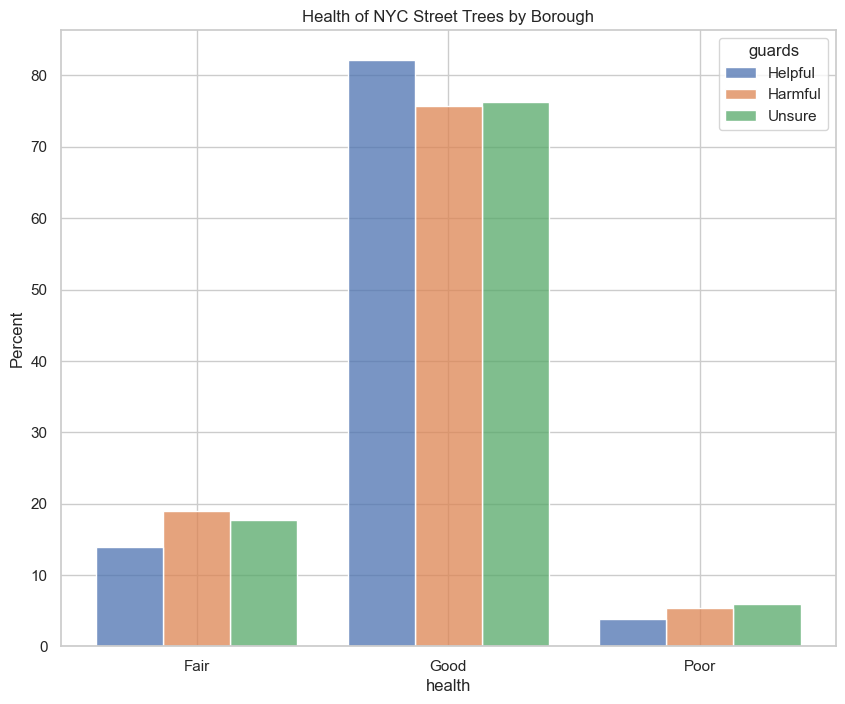

In [66]:
plt.figure(figsize=(10,8))
sns.histplot(data=new_data, x='health', hue='guards', multiple='dodge', stat='percent', shrink=0.8, common_norm=False)
plt.title('Health of NYC Street Trees by Borough')
plt.show()


The graph titled "Health of NYC Street Trees by Borough" illustrates the distribution of tree health statuses—Fair, Good, and Poor—across different New York City boroughs. Each health status is further divided based on the perception of tree guards being "Helpful," "Harmful," or "Unsure."

Key observations from the graph include:
- The majority of trees in the "Good health" category are associated with tree guards considered "Helpful," as indicated by the large blue segment that dominates the middle of the graph.
- The percentage of trees in "Fair" and "Poor" health associated with "Helpful" guards is significantly lower than those in good health. 
- There are small portions of trees in each health category where the guards are considered "Harmful" or the impact of guards is "Unsure." These are represented by the green and tan colors respectively.
- The "Poor health" category has a comparatively higher proportion of trees where the guards are considered "Harmful" or their impact is "Unsure" than in the "Good health" category.

The graph suggests that there is a strong correlation between the perception of tree guards being helpful and trees being in good health. This visualization highlights the potential impact of tree guards on the health of urban trees across different boroughs in New York City, suggesting that well-designed tree guards might play a positive role in maintaining or enhancing tree health.

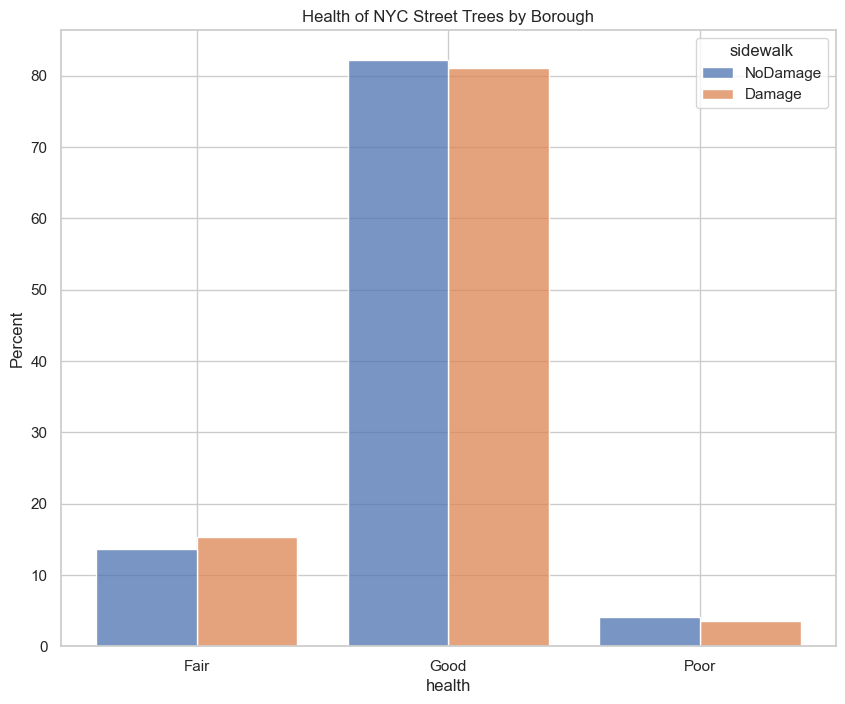

In [67]:
plt.figure(figsize=(10,8))
sns.histplot(data=new_data, x='health', hue='sidewalk', multiple='dodge', stat='percent', shrink=0.8, common_norm=False)
plt.title('Health of NYC Street Trees by Borough')
plt.show()

Summary Statistics for Tree Health vs. Guards: The code groups the data by tree health and the presence of guards, counting the occurrences of each combination.
Summary Statistics for Tree Health vs. Sidewalk Damage: Similar to the previous step, the code groups the data by tree health and the presence of sidewalk damage, counting the occurrences of each combination
 histograms are created using seaborn to visualize the distribution of tree health across different categories of guards and sidewalk damage. Each histogram shows the percentage of trees in each health category, with bars grouped by guards or sidewalk damage.

#### Observations:

The summary statistics provide insights into the distribution of tree health based on the presence of guards or sidewalk damage.
The visualizations offer a clear depiction of how tree health varies across different categories of guards and sidewalk damage.
These analyses can help identify any patterns or correlations between tree health and the presence of guards or sidewalk damage, aiding in urban planning and management decisions related to street tree maintenance.

2.How does tree species diversity correlate with stewardship signs and overall tree health?

To analyze this, we performed several statistical and visual analyses:

- **Quantify Tree Species Diversity:** We firstly established the measure of tree species diversity in each borough or area, which could be done using metrics like species richness (count of different species) which accounts for both abundance and evenness of the species present.

- **Correlate Diversity with Stewardship and Health:** Stewardship Signs: We  explored the areas with higher tree species diversity have more frequent or varied stewardship activities.

- **Overall Tree Health:** We investigated if there's a correlation between the diversity of species and the overall health ratings of trees in those areas.


In [69]:
import numpy as np
# Calculate species counts per borough
species_per_borough = data.groupby('borough')['spc_common'].nunique()


def shannon_diversity_index(species):
    species_counts = species.value_counts()
    total = species_counts.sum()
    p = species_counts / total
    shannon_diversity = -(p * np.log(p)).sum()
    return shannon_diversity

diversity_index = data.groupby('borough')['spc_common'].apply(shannon_diversity_index)

In [70]:
species_per_borough

borough
Bronx            132
Brooklyn         132
Manhattan        128
Queens           132
Staten Island    131
Name: spc_common, dtype: int64

In [71]:
diversity_index

borough
Bronx            3.443129
Brooklyn         3.218722
Manhattan        2.928744
Queens           3.324239
Staten Island    3.232334
Name: spc_common, dtype: float64

In [72]:
# Stewardship relation
stewardship_counts = data.groupby('borough')['steward'].value_counts().unstack()
health_ratings = data.groupby('borough')['health'].value_counts().unstack()

In [73]:
health_ratings

health,Fair,Good,Poor
borough,,,
Bronx,10887,71221,3095
Brooklyn,25073,145761,6459
Manhattan,11460,50354,3609
Queens,34549,206585,9417
Staten Island,14535,86545,4238


In [74]:
stewardship_counts

steward,1or2,3or4,4orMore
borough,,,
Bronx,84277,855,71
Brooklyn,170710,6050,533
Manhattan,57052,7817,554
Queens,247146,3065,340
Staten Island,103810,1396,112


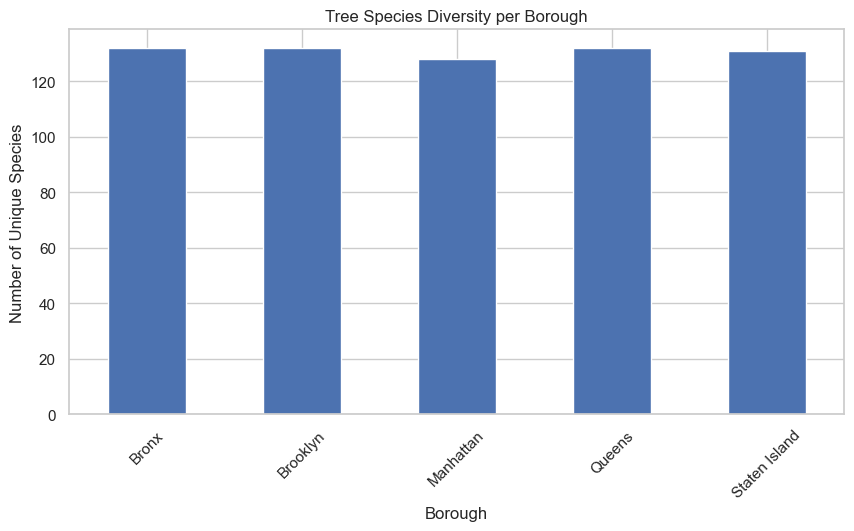

<Figure size 1000x500 with 0 Axes>

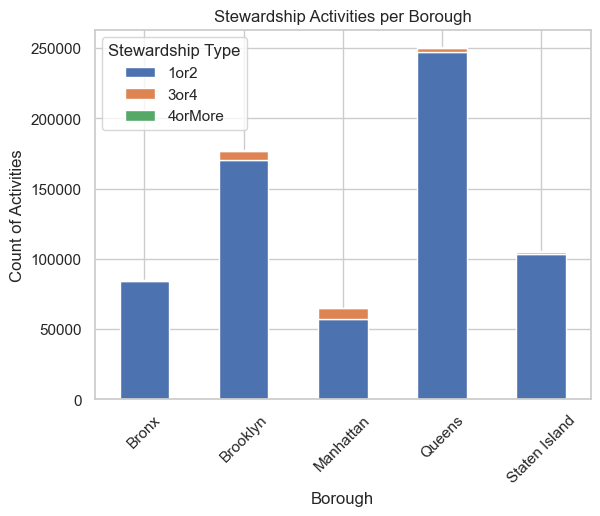

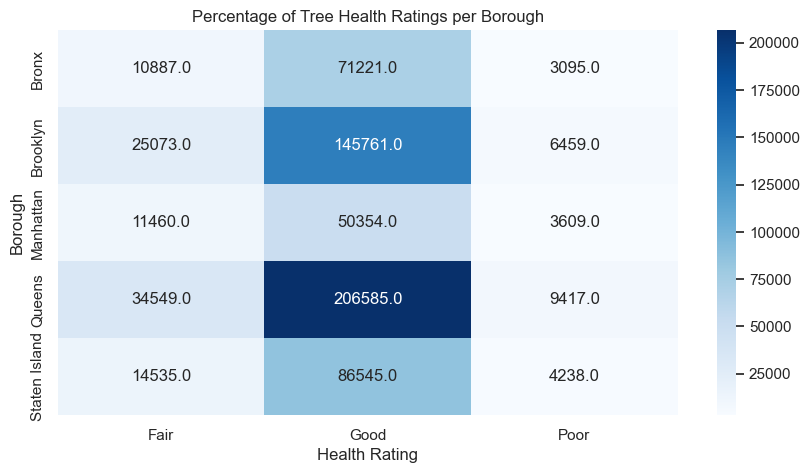

In [78]:
# Plot for Tree Species Diversity
plt.figure(figsize=(10, 5))
species_per_borough.plot(kind='bar')
plt.title('Tree Species Diversity per Borough')
plt.ylabel('Number of Unique Species')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.show()

# Plot for Stewardship Activities
plt.figure(figsize=(10, 5))
stewardship_counts.plot(kind='bar', stacked=True)
plt.title('Stewardship Activities per Borough')
plt.ylabel('Count of Activities')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.legend(title='Stewardship Type')
plt.show()

# Plot for Tree Health Ratings
plt.figure(figsize=(10, 5))
sns.heatmap(health_ratings, annot=True, cmap='Blues', fmt=".1f")
plt.title('Percentage of Tree Health Ratings per Borough')
plt.ylabel('Borough')
plt.xlabel('Health Rating')
plt.show()

Number of unique tree species present in each borough and computes the Shannon diversity index, a measure of species diversity, for each borough. It then creates a bar plot to visualize the diversity of tree species per borough. 
bar plot displays the count of stewardship activities per borough, stacked by the type of activity.
 heatmap is generated using seaborn to visualize the percentage distribution of tree health ratings across 
boroughs.

#### Observations:
The species diversity plot reveals variations in the number of unique tree species across different boroughs.
The stewardship activities plot shows the distribution of various types of stewardship activities undertaken in each borough.
The heatmap provides insights into the distribution of tree health ratings, indicating areas with higher or lower percentages of trees rated as healthy, fair, or poor in each borough.
Overall, these analyses help understand the ecological diversity, stewardship efforts, and health status of trees in different boroughs, aiding in urban forestry management and conservation planning.

#### Conclusions

This research set out to explore the impact of urban infrastructure, specifically sidewalk conditions and tree guards, on the health of street trees across New York City, as well as the influence of tree species diversity and stewardship activities on overall tree health. The study utilized comprehensive datasets from the NYC Parks Department's Street Tree Census and additional data scraped from the NYC Street Tree Map.

**Key Findings:**
1. **Sidewalk Condition and Tree Health:** We found a significant correlation between the condition of sidewalks and tree health. Trees located near damaged sidewalks generally exhibited poorer health compared to those near undamaged sidewalks. This suggests that maintaining sidewalk integrity can be beneficial to tree health.

2. **Impact of Tree Guards:** The analysis revealed that tree guards perceived as helpful are predominantly associated with trees in good health. Conversely, trees near harmful tree guards or where the impact of guards was unclear tended to be in poorer health. This indicates the importance of appropriately designed and maintained tree guards.

3. **Tree Species Diversity and Stewardship:** Trees in areas with higher species diversity and active stewardship signs showed better health outcomes. This underscores the value of community engagement in urban tree management and the potential benefits of biodiversity.

**Answering Research Questions:**
- The study effectively answered the primary research questions, providing clear evidence that both the physical urban infrastructure and community stewardship play crucial roles in maintaining and enhancing urban tree health.

**Future Extensions:**
- **Further Analysis with Controlled Variables:** Future studies could control for additional variables such as age of trees, specific tree species, and environmental factors like air pollution levels to refine our understanding of what influences tree health.
- **Longitudinal Studies:** A longitudinal approach could track changes over time, especially in response to improvements in infrastructure or increased community stewardship efforts.
- **Expansion to Other Cities:** Comparing results with data from other cities could help generalize findings and potentially influence broader urban forestry policies.
- **Impact of Urban Wildlife:** Exploring how urban wildlife affects tree health could add another layer to our understanding of urban ecosystems.

In conclusion,

the project successfully highlights the significant impact of well-maintained urban infrastructure and active community stewardship on the health of urban trees. By fostering better sidewalk conditions and ensuring the appropriate use of tree guards, urban planners and community organizations can significantly improve the health of city trees. Additionally, promoting species diversity and community engagement in tree care emerges as a key strategy for sustaining healthy urban forests. This research provides actionable insights that can guide policies and practices aimed at enhancing the vitality and sustainability of urban green spaces.